In [3]:
!unzip -q yawning-detection.zip -d data/

In [4]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('data/train.csv')
try:
  os.makedirs('data/train/yawning')
  os.makedirs('data/train/not_yawning')
except:
  print('Directories already created')

df
for i, row in df.iterrows():
  filename = row['image_id'][6:]
  if row['label']:
    os.rename("data/train/"+filename, "data/train/yawning/"+filename)
  else:
    os.rename("data/train/"+filename, "data/train/not_yawning/"+filename)

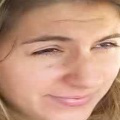

(120, 120, 3)


In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image 
from matplotlib.pyplot import imshow
%matplotlib inline

img = load_img('data/train/yawning/123456 (1201).jpg')
x = img_to_array(img)
display(img)
print(x.shape)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 118, 118, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 57, 57, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1

In [12]:
batch_size = 32
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train/',  # this is the target directory
        target_size=(120, 120),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary', subset='training')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = train_datagen.flow_from_directory(
        'data/train/',
        target_size=(120, 120),
        batch_size=batch_size,
        class_mode='binary', subset='validation')

Found 4194 images belonging to 2 classes.
Found 1048 images belonging to 2 classes.


In [13]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 16s 149ms/step - loss: 0.7017 - accuracy: 0.5310 - val_loss: 0.6983 - val_accuracy: 0.4975
Epoch 2/10
62/62 [==============================] - 9s 146ms/step - loss: 0.6929 - accuracy: 0.5309 - val_loss: 0.6551 - val_accuracy: 0.6712
Epoch 3/10
62/62 [==============================] - 9s 147ms/step - loss: 0.5798 - accuracy: 0.7205 - val_loss: 0.4864 - val_accuracy: 0.8225
Epoch 4/10
62/62 [==============================] - 9s 145ms/step - loss: 0.4652 - accuracy: 0.8026 - val_loss: 0.3381 - val_accuracy: 0.8537
Epoch 5/10
62/62 [==============================] - 9s 148ms/step - loss: 0.3841 - accuracy: 0.8554 - val_loss: 0.2900 - val_accuracy: 0.8813
Epoch 6/10
62/62 [==============================] - 9s 145ms/step - loss: 0.3874 - accuracy: 0.8431 - val_loss: 0.2381 - val_accuracy: 0.9000
Epoch 7/10
62/62 [==============================] - 9s 145ms/step - loss: 0.3371 - accuracy: 0.8589 - val_loss: 0.2699 - val_accuracy: 0.9013
Epoch

In [ ]:
import keras
import tensorflow as tf
img = keras.preprocessing.image.load_img(
    "data/test/123456 (487).jpg", target_size=(120, 120)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions
print(score)


In [27]:
from keras.preprocessing import image
images = []
folder_path = 'data/test/'
test_df = pd.read_csv('data/sample_submission.csv')
for i, row in test_df.iterrows():
    img = os.path.join(folder_path, row['image_id'][5:])
    img = image.load_img(img, target_size=(120, 120))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
# images
# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=16).reshape(-1)
print(classes)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 1 0 ... 1 1 0]


In [28]:
test_df['label'] = classes
test_df

,image_id,label
0,test\1234567 (1171).jpg,0
1,test\123456 (3940).jpg,1
2,test\1234567 (178).jpg,0
3,test\1234567 (809).jpg,0
4,test\123456 (681).jpg,1
...,...,...
2939,test\1234567 (682).jpg,0
2940,test\123456 (212).jpg,1
2941,test\123456 (3914).jpg,1
2942,test\123456 (961).jpg,1


In [30]:
test_df.to_csv('first_submission.csv', index=False)